In [1]:
#Building a CNN using function API
import tensorflow
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical #for one hot encoding

In [4]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
img_size = x_train.shape[1] #height or width
x_train = np.reshape(x_train,[-1,img_size,img_size,1]) #img size and 1 as only one channel
x_test = np.reshape(x_test,[-1,img_size,img_size,1])
x_train=x_train/255
x_test=x_test/255

In [8]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


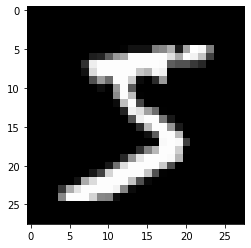

In [9]:
test = x_train[0].copy()
test = test.reshape(img_size,img_size)
plt.imshow(test,cmap='gray')

In [10]:
# building the main model
inputs = Input(shape = (img_size,img_size,1))
x = Conv2D(filters=64,kernel_size=3,activation = 'relu',padding='same')(inputs)
x= MaxPooling2D()(x)
x = Conv2D(filters=32,kernel_size=3,activation = 'relu',padding='same')(x)
x= MaxPooling2D()(x)
x = Conv2D(filters=32,kernel_size=3,activation = 'relu',padding='same')(x)
x= MaxPooling2D()(x)
x=Flatten()(x)
x = Dropout(0.4)(x)
outputs = Dense(10,activation = 'softmax')(x)

In [11]:
model = Model(inputs = inputs,outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 32)          0     

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model.load_weights('API_implementation_weights.h5')

In [ ]:
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

In [14]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 5s 505us/sample - loss: 0.0267 - accuracy: 0.9911


[0.026686030039451726, 0.9911]

In [21]:
np.argmax(model.predict(np.reshape(x_test[750],(-1,img_size,img_size,1)))) #index corresp to max probab

0

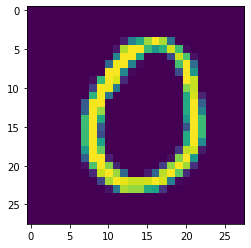

In [22]:
test = np.reshape(x_test[750],(img_size,img_size)) #verify the models output
plt.imshow(test)

In [ ]:
model.save_weights('API_implementation_weights.h5')

In [17]:
from tensorflow.keras.utils import plot_model


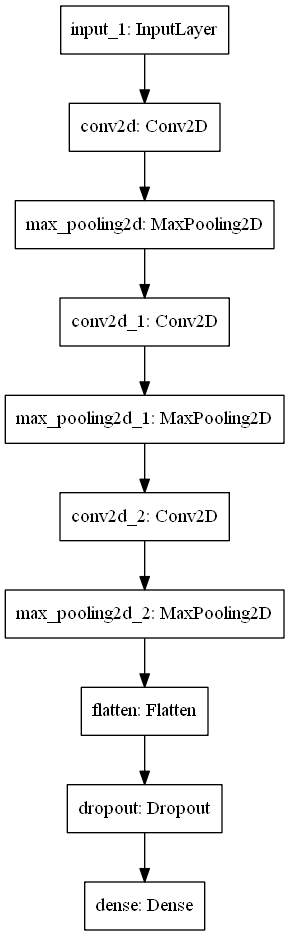

In [18]:

plot_model(model)